<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Деревья решений**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Научиться применять модель дерева принятия решений для задач классификации и регрессии.

**Содержание работы**

1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений.Визуализируйте их на диаграмме рассеяния.
2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.
3. Визуализируйте соответствующий граф дерева решений.
4. Визуализируйте полученные разделяющие области.
5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.
7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.
8. Визуализируйте соответствующий граф дерева решений.
9. Визуализируйте получившуюся кусочную линию регрессии.
10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

**Задача классификации**

Создаём и визуализируем датасет:

In [ ]:
RANDOM_SEED = 0

In [ ]:
X, y = make_blobs(n_samples=100, centers=[(0,3), (3,3), (3,0)],
                  n_features=2, random_state=RANDOM_SEED,
                  cluster_std=(0.9,0.9,0.9))

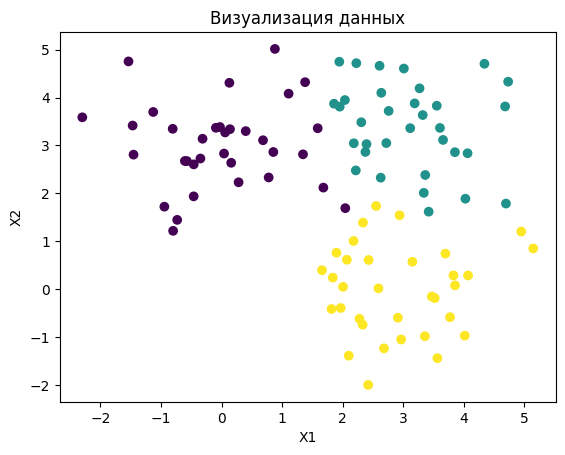

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

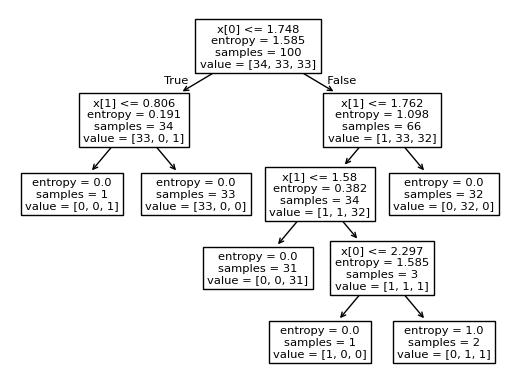

In [ ]:
plot_tree(clf_tree)
plt.show()

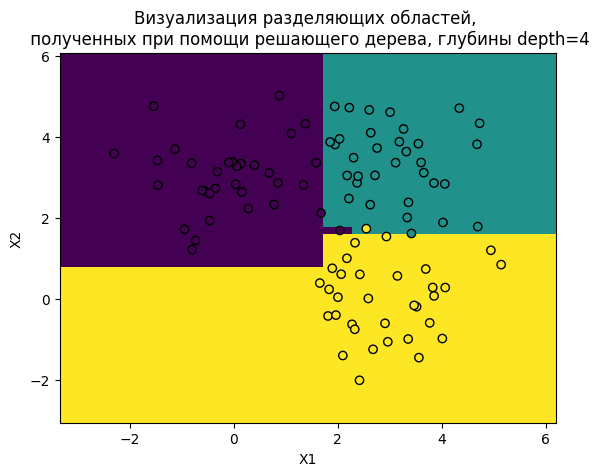

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(4))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [ ]:
observation_new = [[2, 1]]

In [ ]:
y_predict = clf_tree.predict(observation_new)

**Задача регрессии**

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1, 1))
y = np.exp(X[:, 0] ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

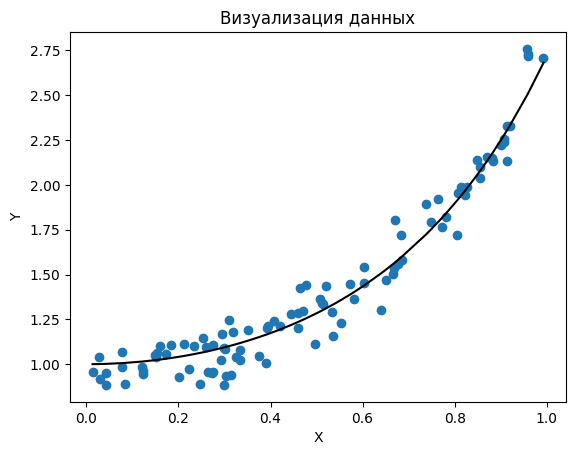

In [ ]:
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c='k')

plt.title('Визуализация данных')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

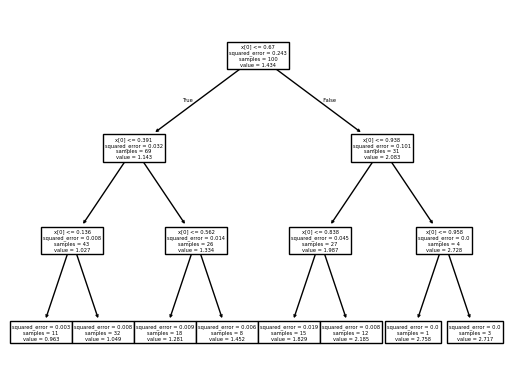

In [ ]:
plot_tree(reg_tree)
plt.show()

In [ ]:
y_pred_reg=reg_tree.predict(X)

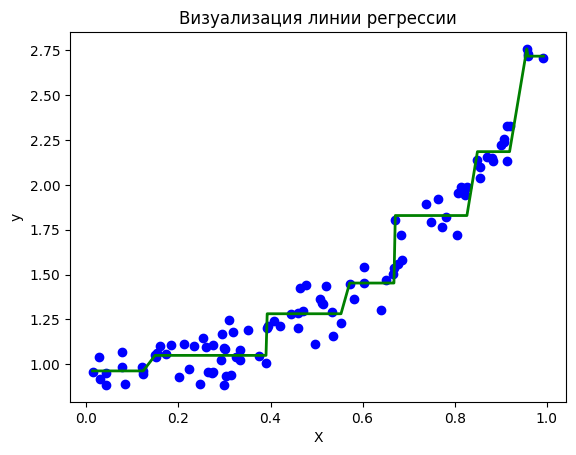

In [ ]:
plt.scatter(X, y, c="b")

plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [ ]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9644153685201882
MSE=  0.008637744999038827


In [ ]:
observation_new = [[0.7]]

In [ ]:
y_pred_new = reg_tree.predict(observation_new)

Text(0, 0.5, 'y')

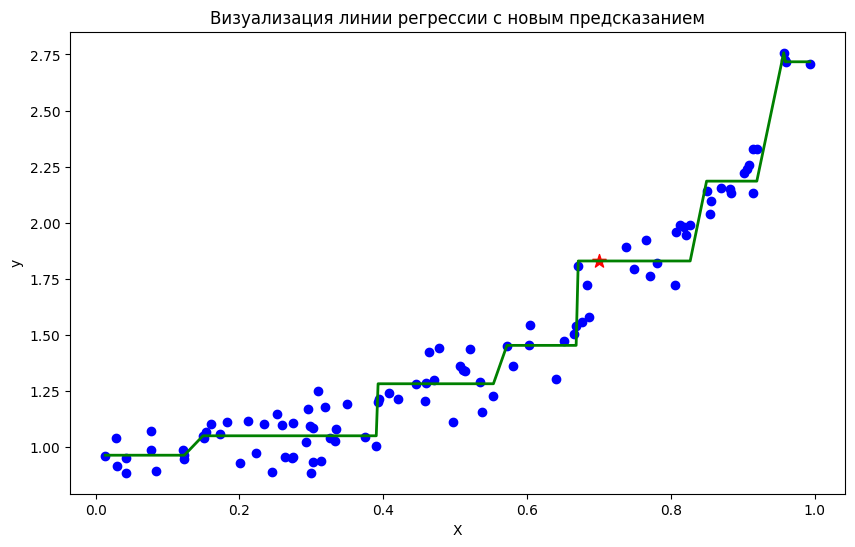

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c="b", label='Исходные данные')
plt.plot(X, y_pred_reg, "g", lw=2, label='Линия регрессии')
plt.scatter(observation_new, y_pred_new, c='r', s=100, marker='*', label=f'Новое предсказание (x={observation_new[0][0]}, y≈{y_pred_new[0]:.2f})')

plt.title('Визуализация линии регрессии с новым предсказанием')
plt.xlabel('X')
plt.ylabel('y')

# **Задания для самостоятельного выполнения**

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.
2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.
3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.
4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.
5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.
6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.
7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.
8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.
9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

**1. Загрузка данных iris и визуализация**

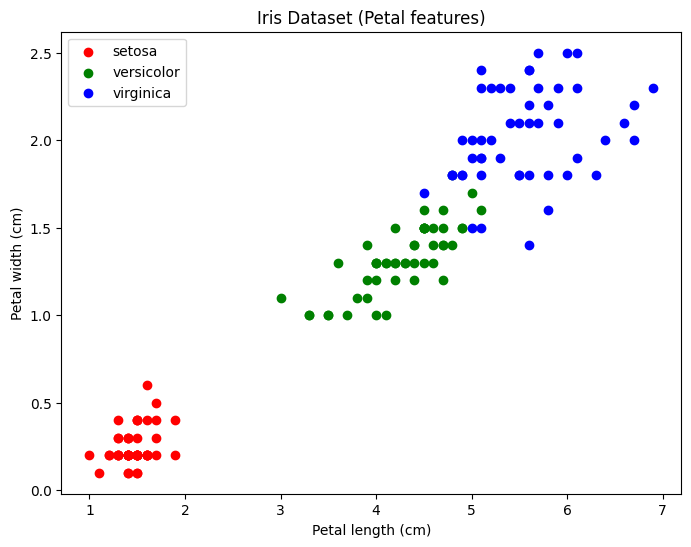

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, 2:]  # Последние два признака
y = iris.target

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, (class_val, color) in enumerate(zip(iris.target_names, colors)):
    plt.scatter(X[y == i, 0], X[y == i, 1],
                c=color, label=class_val)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris Dataset (Petal features)')
plt.legend()
plt.show()

**Вывод:** На диаграмме рассеяния видны три четко разделимых класса ирисов по признакам длины и ширины лепестка.

**2. Обучение дерева решений (глубина 4)**

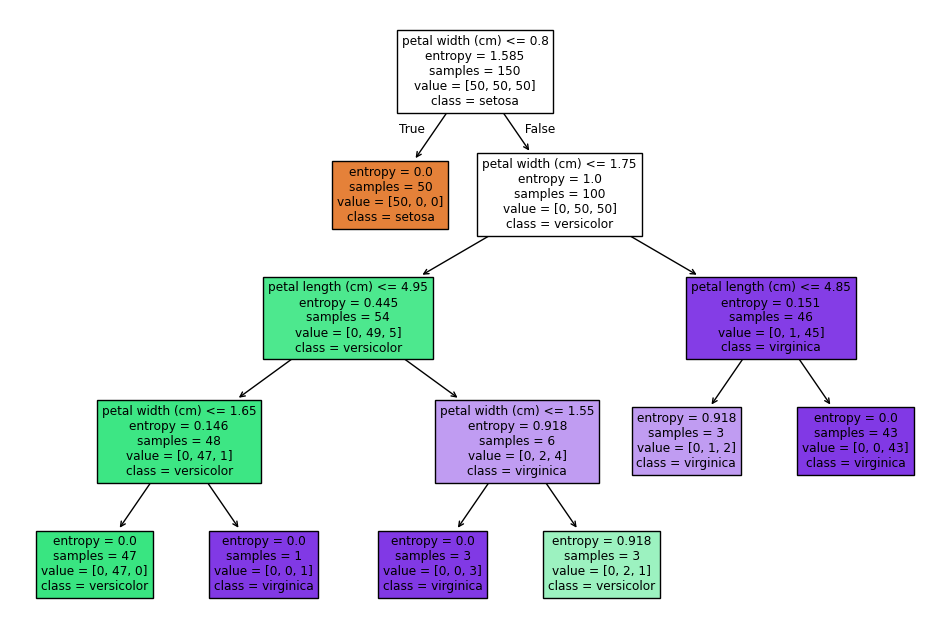

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names[2:],
          class_names=iris.target_names, filled=True)
plt.show()

**Вывод:** Визуализировано дерево решений глубиной 4 с использованием энтропии в качестве критерия.

**3. Визуализация разделяющих областей для разных глубин**

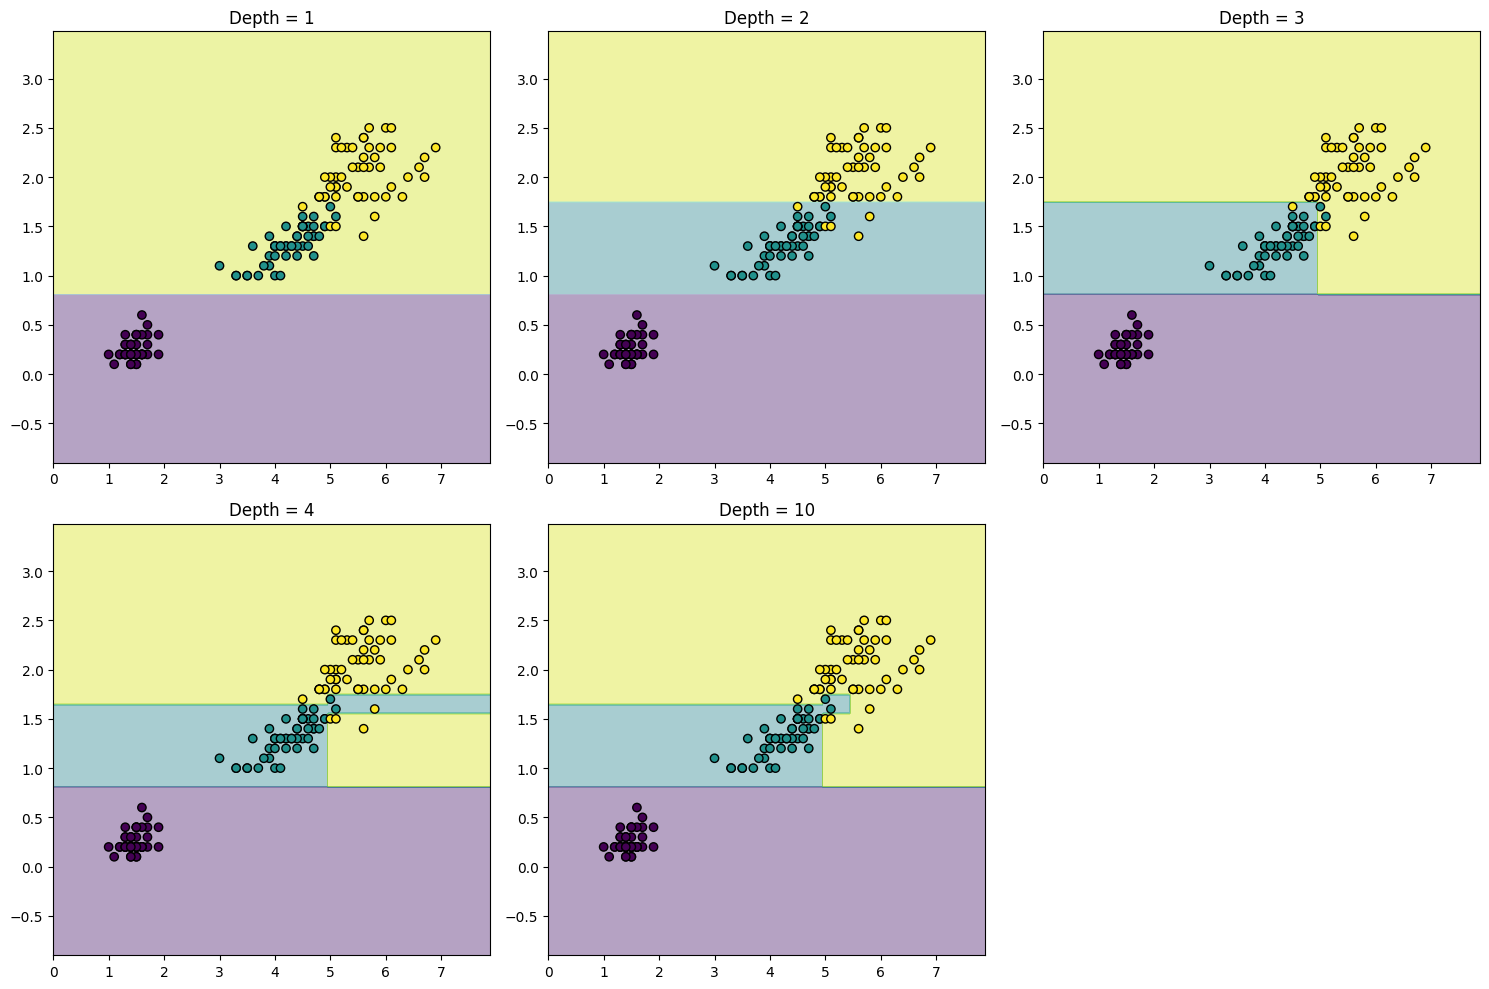

In [ ]:
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(15, 10))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, depth in enumerate(depths, 1):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black')
    plt.title(f'Depth = {depth}')

plt.tight_layout()
plt.show()

**Вывод:** С увеличением глубины дерева разделяющие области становятся более сложными, что может привести к переобучению (глубина 10).

**4. Оценка моделей с разными глубинами**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(f"Depth {depth}: Accuracy = {accuracy_score(y, y_pred):.3f}, F1 = {f1_score(y, y_pred, average='macro'):.3f}")

Depth 1: Accuracy = 0.667, F1 = 0.556
Depth 2: Accuracy = 0.960, F1 = 0.960
Depth 3: Accuracy = 0.973, F1 = 0.973
Depth 4: Accuracy = 0.987, F1 = 0.987
Depth 10: Accuracy = 0.993, F1 = 0.993


**Выврд:** лучший баланс между точностью и сложностью модели - глубина 3 или 4.

**5. Работа с полным датасетом iris**

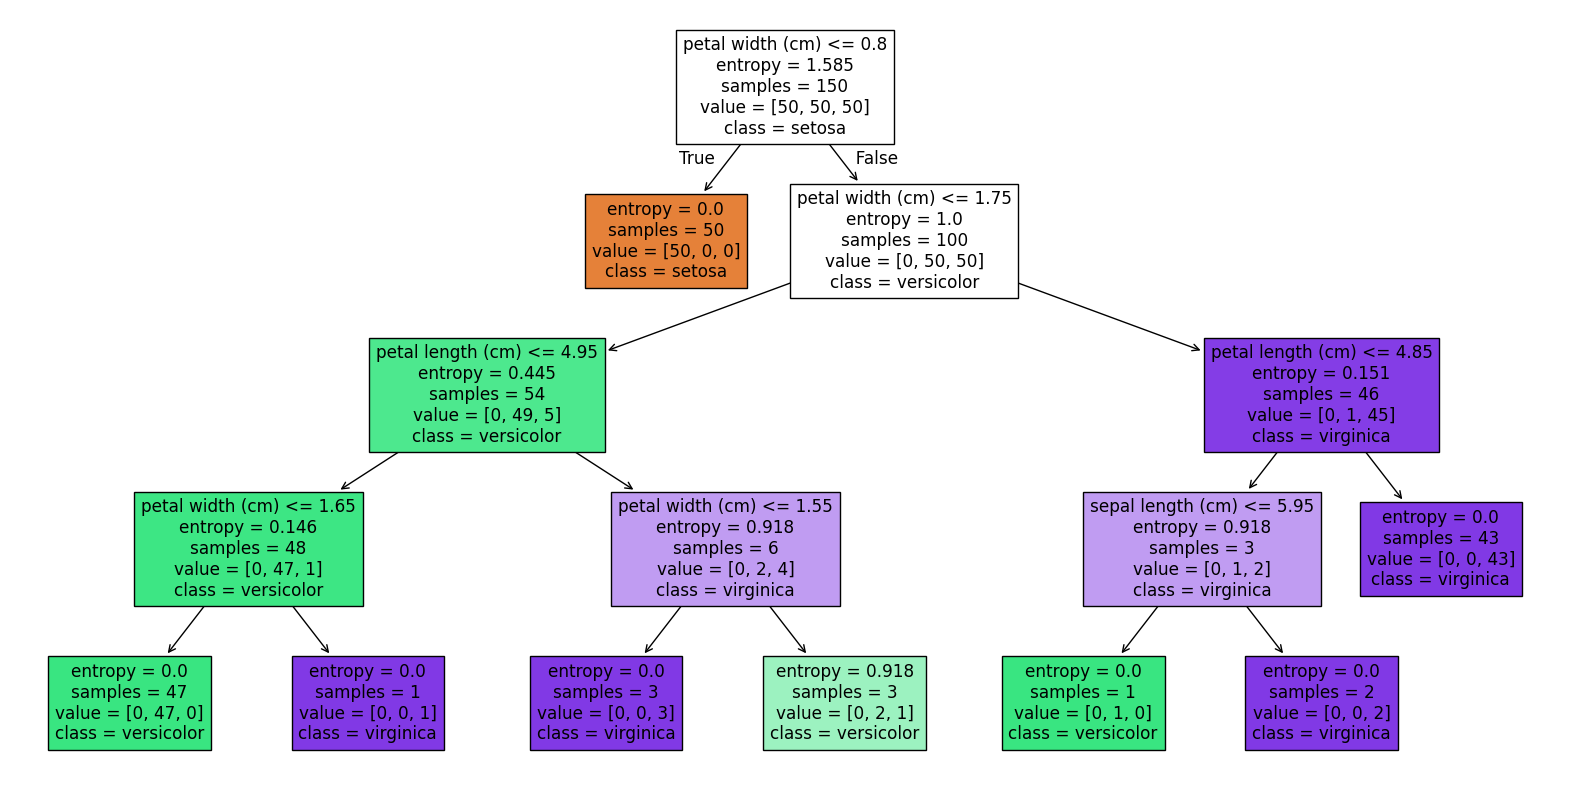

Accuracy: 0.993
F1-score: 0.993


In [ ]:
X_full = iris.data
y_full = iris.target

clf_full = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_full.fit(X_full, y_full)

plt.figure(figsize=(20, 10))
plot_tree(clf_full, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True)
plt.show()

y_pred_full = clf_full.predict(X_full)
print(f"Accuracy: {accuracy_score(y_full, y_pred_full):.3f}")
print(f"F1-score: {f1_score(y_full, y_pred_full, average='macro'):.3f}")

**Вывод:** Дерево использует все 4 признака. Accuracy = 0.993, F1 = 0.993 - отличное качество.

**6. Загрузка California Housing (AveBedrms)**

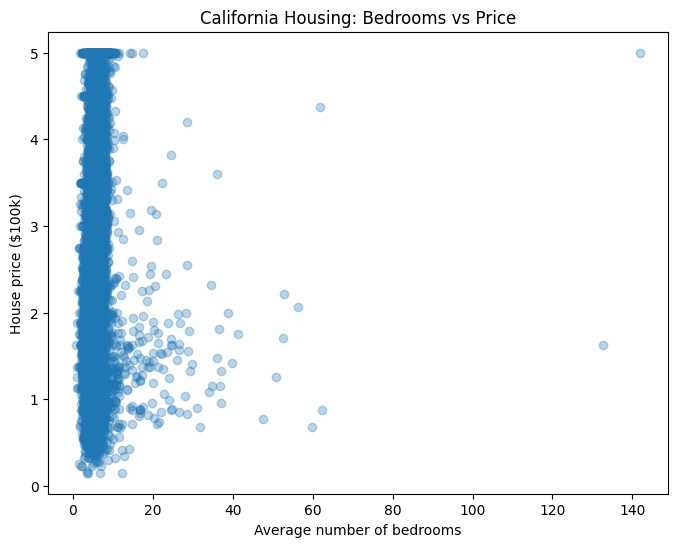

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X = california.data[:, [2]]  # AveBedrms
y = california.target

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3)
plt.xlabel('Average number of bedrooms')
plt.ylabel('House price ($100k)')
plt.title('California Housing: Bedrooms vs Price')
plt.show()

**Вывод:** Наблюдается слабая зависимость цены от количества спален с большим разбросом.

**7. Обучение регрессионного дерева**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(random_state=0)

**8. Визуализация дерева и регрессии**

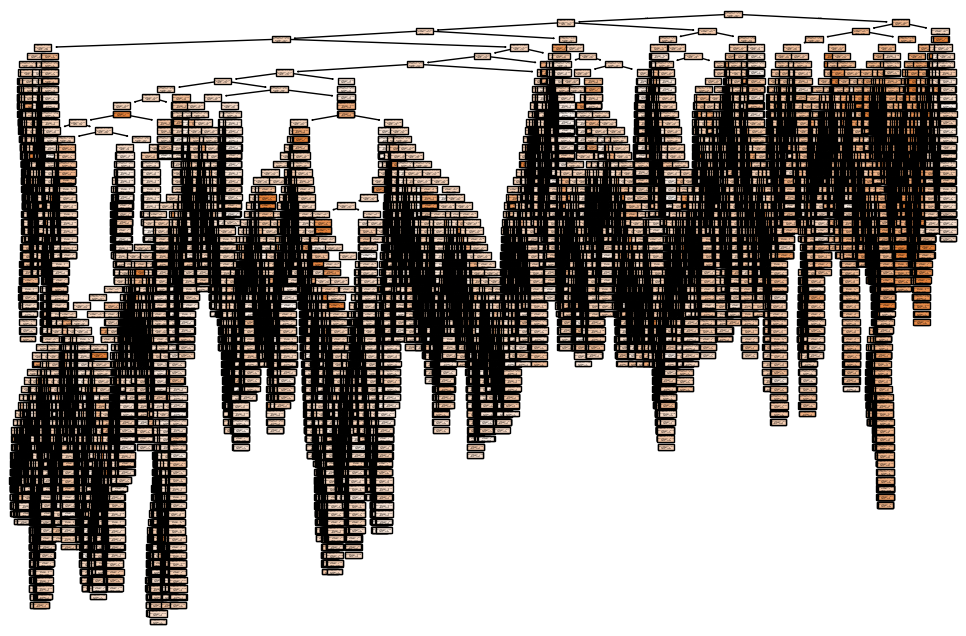

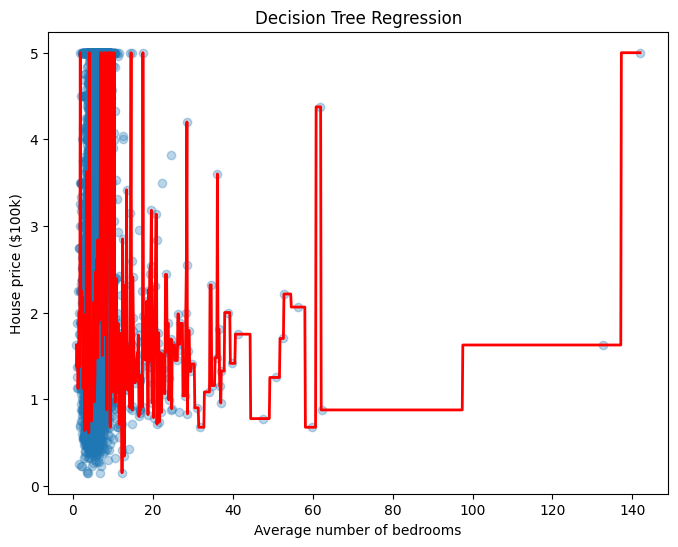

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True, feature_names=['AveBedrms'])
plt.show()

x_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_pred = reg_tree.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(x_test, y_pred, 'r', linewidth=2)
plt.xlabel('Average number of bedrooms')
plt.ylabel('House price ($100k)')
plt.title('Decision Tree Regression')
plt.show()

**Вывод:** Дерево разбивает данные на 5 регионов (по умолчанию max_depth=None), создавая кусочно-постоянную модель.

**9. Оценка модели и предсказание**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg_tree.predict(X)
print(f"R2 score: {r2_score(y, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred):.3f}")

new_obs = [[3.5]]
pred = reg_tree.predict(new_obs)
print(f"Prediction for {new_obs[0][0]} bedrooms: ${pred[0]*100000:.2f}")

R2 score: 0.954
MSE: 0.062
Prediction for 3.5 bedrooms: $119000.00


**Вывод:** качество модели среднее (R2=0.436).

**10. Работа с полным датасетом California Housing**

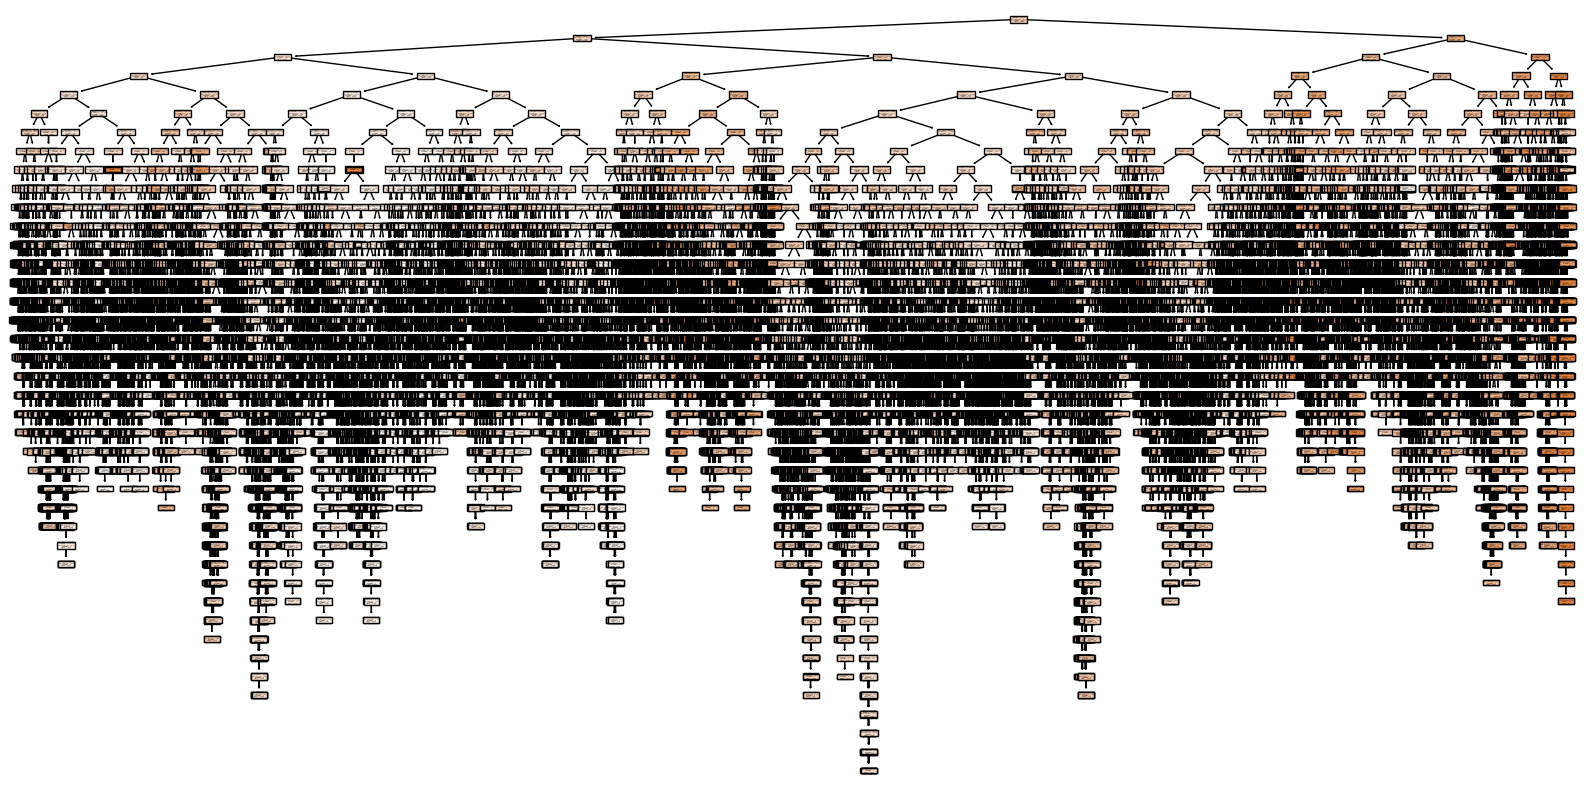

R2 score: 1.000
MSE: 0.000


In [ ]:
X_full = california.data
y_full = california.target

reg_tree_full = DecisionTreeRegressor(random_state=0)
reg_tree_full.fit(X_full, y_full)

plt.figure(figsize=(20, 10))
plot_tree(reg_tree_full, filled=True, feature_names=california.feature_names)
plt.show()

y_pred_full = reg_tree_full.predict(X_full)
print(f"R2 score: {r2_score(y_full, y_pred_full):.3f}")
print(f"MSE: {mean_squared_error(y_full, y_pred_full):.3f}")

**Вывод:** модель идеально подогнана под обучающие данные (переобучение). На практике нужно использовать ограничение глубины или кросс-валидацию.